In [1]:
import RODFF.Mesh_maker as Mesh_maker
import RODFF.Functions as Functions
import RODFF.Calc_path as Calc_path
import RODFF.Flow_class as Flow_class

import pytest
from click.testing import CliRunner
import numpy as np
from scipy.spatial import Delaunay
from scipy.signal import argrelextrema

In [32]:
def test_Graph():
    node1 = 1
    node2 = 2
    node3 = 3
    weight = np.pi
    G = Mesh_maker.Graph()
    
    G.add_edge(node1,node2,weight)
    assert G.weights[1,2] == weight
    assert G.edges[node1] == [node2]
    assert G.edges[node2] == []
    assert G.edges[node3] == []

    G.add_edge(node1,node3,weight)
    assert G.weights[1,3] == weight
    assert G.edges[node1] == [node2, node3]
    assert G.edges[node2] == []
    assert G.edges[node3] == []

    G.add_edge(node2,node1,weight)
    assert G.weights[2,1] == weight
    assert G.edges[node1] == [node2, node3]
    assert G.edges[node2] == [node1]
    assert G.edges[node3] == []


    G.add_edge(node2,node3,weight)
    assert G.weights[2,3] == weight
    assert G.edges[node1] == [node2, node3]
    assert G.edges[node2] == [node1, node3]
    assert G.edges[node3] == []

    G.add_edge(node3,node1,weight)
    assert G.weights[3,1] == weight
    assert G.edges[node1] == [node2, node3]
    assert G.edges[node2] == [node1, node3]
    assert G.edges[node3] == [node1]

    G.add_edge(node3,node2,weight)
    assert G.weights[3,2] == weight
    assert G.edges[node1] == [node2, node3]
    assert G.edges[node2] == [node1, node3]
    assert G.edges[node3] == [node1, node2]

def test_find_neighbor():
    nodes =[(3,3),
            (2,2),(2,4),(4,2),(4,4), 
            (1,1),(1,3),(1,5),(3,1),(3,5),(5,1),(5,3),(5,5),
            (0,0),(0,2),(0,4),(0,6),(2,0),(4,0),(2,6),(4,6),(6,0),(6,2),(6,4),(6,6),
           ] 

    tria = Delaunay(nodes)
    nb = Mesh_maker.find_neighbors(0, tria)
    
    assert len(nb) == 4
    for i in range(1,5):
        assert i in nb

def test_find_neighbor2():
    nodes =[(3,3),
            (2,2),(2,4),(4,2),(4,4), 
            (1,1),(0.9,3),(1,5),(3,1),(3,5.1),(5,1),(5,3),(5,5),
            (0,0),(-.1,2),(-.1,4),(0,6),(2,0),(4,0),(2,6.1),(4,6.1),(6,0),(6,2),(6,4.1),(6,6),
           ] 
    tria = Delaunay(nodes)
    
    nb = Mesh_maker.find_neighbors2(0, tria,0)
    assert len(nb) == 0
    
    nb = Mesh_maker.find_neighbors2(0, tria,1)
    assert len(nb) == 4
    for i in range(1,5):
        assert i in nb
        
    nb = Mesh_maker.find_neighbors2(0, tria,2)
    assert len(nb) == 12
    for i in range(1,13):
        assert i in nb

    nb = Mesh_maker.find_neighbors2(0, tria,3)
    assert len(nb) == 24
    for i in range(1,25):
        assert i in nb

def test_FIFO_maker():
    x = np.arange(0,2*np.pi,0.01)
    y = 2*np.sin(x)+x
    y = Mesh_maker.FIFO_maker(y)
    loc_min = argrelextrema(y, np.less)
    assert len(loc_min[0]) == 0
    
    x = np.arange(0,4*np.pi,0.01)
    y = 2*np.sin(x)+x
    y = Mesh_maker.FIFO_maker(y)
    loc_min = argrelextrema(y, np.less)
    assert len(loc_min[0]) == 0
    
def test_closest_node():
    nodes = np.array([(0,0),(-1,-1),(-2,2),(-2,-2),(2,2),(2,-2),(0,1)])
    node = 0
    node_list = np.arange(1,5, dtype=int)

    cn = Mesh_maker.closest_node(node,node_list, nodes)
    assert cn == 1
    
def test_Length_scale(flow):
    blend = 0
    nl = (1,1)

    nodes = (flow.nodes)
    for i in range(len(nodes)):
        ls = Mesh_maker.Length_scale(i, flow, blend, nl)
        assert ls == 0.5

In [33]:
test_Graph()
test_find_neighbor()
test_find_neighbor2()
test_FIFO_maker()
test_closest_node()
test_Length_scale(flow)

print('Passed all tests')

Passed all tests


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
class flow_class():
    def __init__(self):
        self.t = np.arange(0,10)
        
        x = np.arange(0,10,0.5)
        xx, yy = np.meshgrid(x,x)
        xx = xx.reshape(xx.size)
        yy = yy.reshape(yy.size)
        self.nodes = np.zeros((len(xx),2))
        self.nodes[:,0] = xx
        self.nodes[:,1] = yy
        self.tria = Delaunay(self.nodes)
        
        self.WD = np.ones((len(self.t), len(self.nodes)))*100
        self.u = [np.sin(self.nodes[:,0]/10*2*np.pi)]
        self.v = [np.cos(self.nodes[:,0]/10*2*np.pi)]
        u = self.u
        v = self.v
        
        
        for i in range(len(self.t)-1):
            self.u = np.concatenate((self.u, u))
            self.v = np.concatenate((self.v, v))


In [16]:
flow = flow_class()
flow.u.shape

(10, 400)

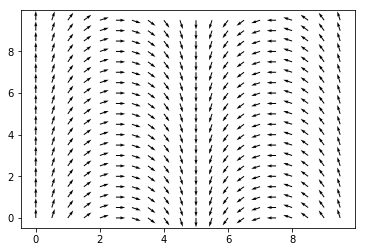

In [18]:
plt.quiver(flow.nodes[:,0],
           flow.nodes[:,1],
           flow.u[0],
           flow.v[0],
          )

In [31]:
blend = 0
nl = (1,1)

nodes = (flow.nodes)
for i in range(len(nodes)):
    ls = Mesh_maker.Length_scale(i, flow, blend, nl)
    assert ls == 0.5
    


In [30]:
LS

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.